In [46]:
import warnings
warnings.filterwarnings('ignore')

import pandas                        as pd
import numpy                         as np
import matplotlib.pyplot             as plt
%matplotlib inline
import seaborn                       as sns
from sklearn import preprocessing


from sklearn.preprocessing           import normalize,StandardScaler,label
from sklearn.model_selection         import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics                 import *

# ML Libraries

from sklearn.ensemble                import RandomForestClassifier
from sklearn.decomposition           import PCA
from xgboost                         import XGBClassifier
from sklearn.linear_model            import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.neighbors               import KNeighborsClassifier
                                     


from imblearn.over_sampling          import *
from imblearn.combine                import *
from collections                     import Counter

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


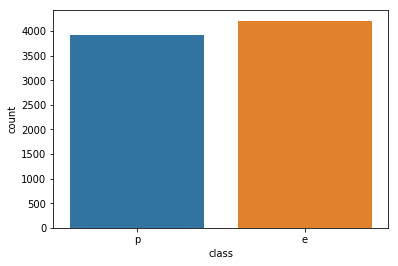

In [5]:
sns.countplot(x=df['class'])

In [15]:
labelEncoder = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = labelEncoder.fit_transform(df[col])

In [17]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

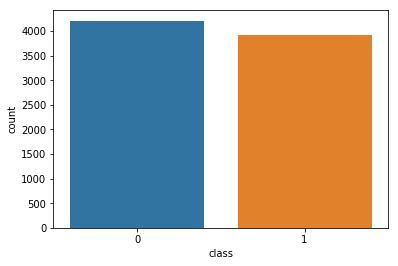

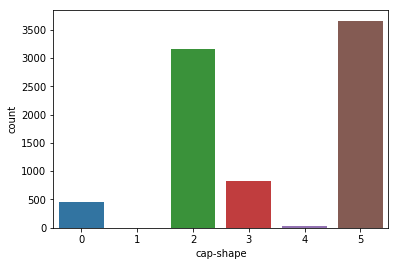

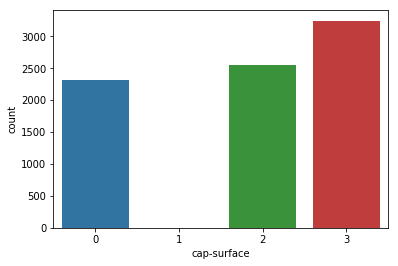

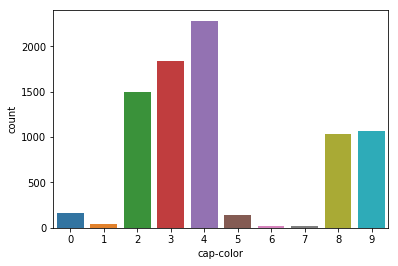

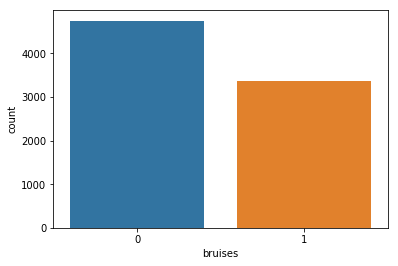

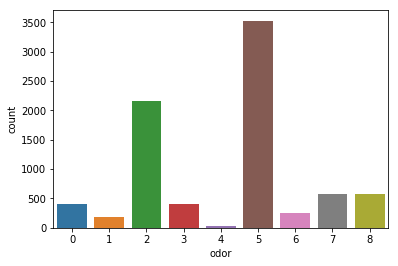

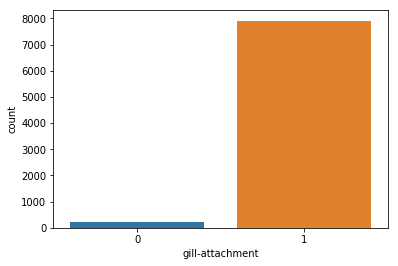

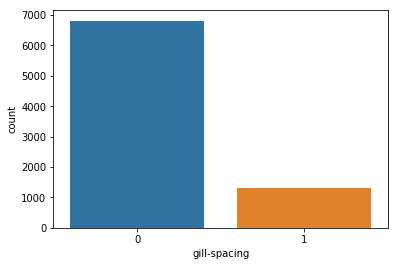

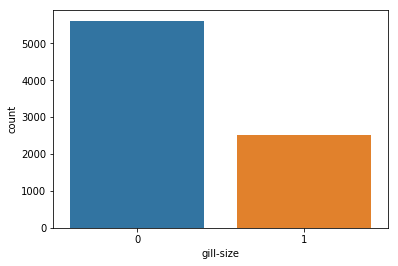

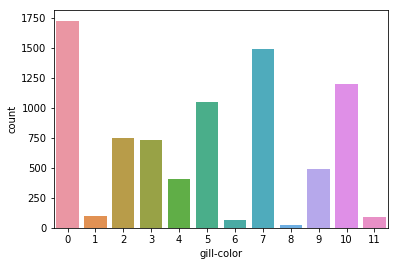

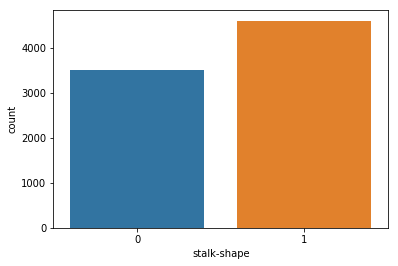

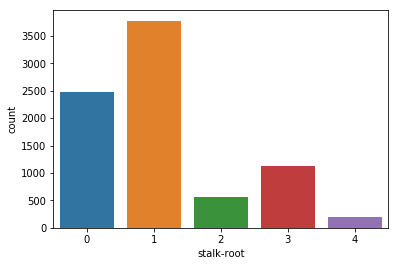

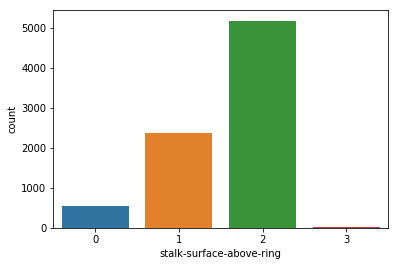

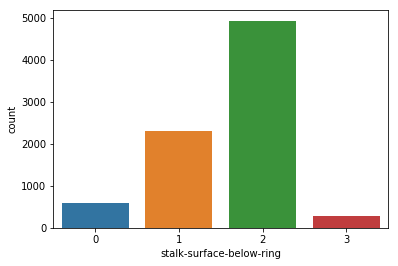

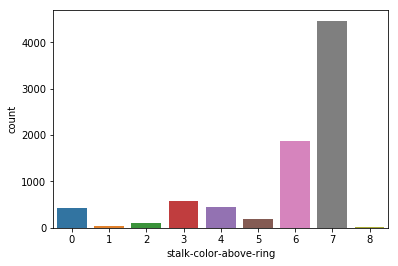

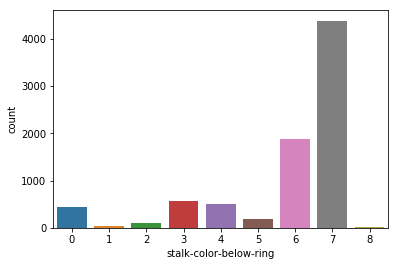

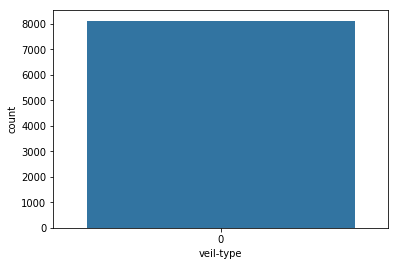

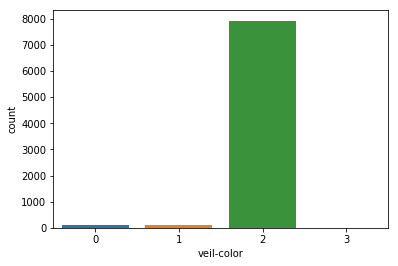

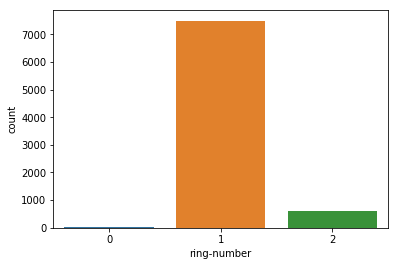

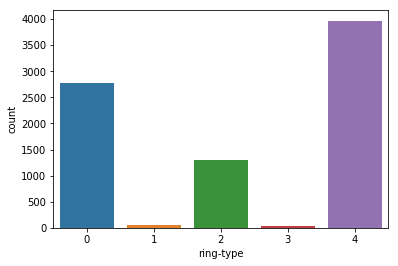

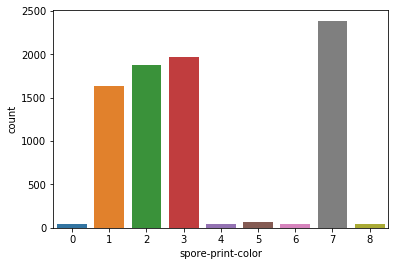

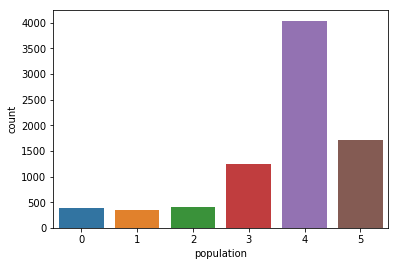

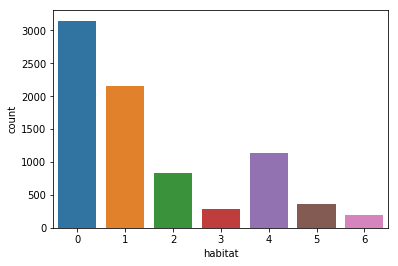

In [19]:
for i,col in enumerate(df):
    plt.figure(i)
    sns.countplot(x=df[col])

In [36]:
Y = df['class']
X = df.iloc[:,1:]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7,shuffle=True)

In [48]:
#listing out the different ML Algorithms
models = []
models.append(('Random Forest with Entropy', RandomForestClassifier(criterion= "entropy", random_state= 111)))
models.append(('Random Forest with gini', RandomForestClassifier(criterion= "gini", random_state= 111)))
models.append(('XGBoost', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 101)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 101)))
models.append(('Logistic Regression', LogisticRegression(random_state= 7)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))

In [49]:
def ROCcurve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

In [60]:
def allmodels():
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","AUC"))
    rownumber = 0
    for name, model in models:
        classifier = model
        classifier.fit(X_train, y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        #print (name)
        #ROCcurve(fpr, tpr)
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(y_test,Y_predict)),2)
        model_list.loc[rownumber,"AUC"]= round((roc_auc_score(y_test,Y_predict)),2)
        Y_pt = classifier.predict(X_train)
        model_list.loc[rownumber,"Accuracy_Train"] = round(((accuracy_score(y_train,Y_pt))*100))
        model_list.loc[rownumber,"F1Score_Train"]= round((f1_score(y_train,Y_pt)),2)
        model_list.loc[rownumber,"AUC_Train"]= round((roc_auc_score(y_train,Y_pt)),2)
        rownumber += 1
    return (model_list.sort_values(by="AUC",ascending=False))

In [66]:
print (allmodels())

                        Model  Accuracy  F1Score   AUC  Accuracy_Train  \
0  Random Forest with Entropy     100.0     1.00  1.00           100.0   
1     Random Forest with gini     100.0     1.00  1.00           100.0   
2                     XGBoost     100.0     1.00  1.00           100.0   
3                        LGBM     100.0     1.00  1.00           100.0   
4   DecisionTree with entropy     100.0     1.00  1.00           100.0   
5      DecisionTree with gini     100.0     1.00  1.00           100.0   
7                         KNN     100.0     1.00  1.00           100.0   
6         Logistic Regression      96.0     0.96  0.96            95.0   

   F1Score_Train  AUC_Train  
0           1.00       1.00  
1           1.00       1.00  
2           1.00       1.00  
3           1.00       1.00  
4           1.00       1.00  
5           1.00       1.00  
7           1.00       1.00  
6           0.95       0.95  
